<a href="https://colab.research.google.com/github/preetham3216/info5731-fall2021/blob/main/In_class_exercise_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The third In-class-exercise (9/29/2021, 40 points in total)

The purpose of this exercise is to understand text representation.

Question 1 (10 points): Describe an interesting text classification or text mining task and explain what kind of features might be useful for you to build the machine learning model. List your features and explain why these features might be helpful. You need to list at least five different types of features.

In [ ]:
# Your answer here (no code for this question, write down your answer as detail as possible for the above questions):

'''
Please write you answer here:
Topic tagging is particularly important to examine tremendous proportions of text data in a speedy and sagacious manner
from internal records, correspondences with customers, or all around the web.
To be sure, you could do it genuinely yet, let's face it, when there's a great deal of information to be described, 
it will just end up being dreary, expensive, and extensively less careful.
The two most common approaches for topic analysis with machine learning are NLP topic modeling and NLP topic classification.
Features:
NLP topic modeling
NLP topic classification
preprocessing
obtaining word embedding
clustering word embedding


'''

Question 2 (20 points): Write python code to extract these features you discussed above. You can collect a few sample text data for the feature extraction. 

In [ ]:
# You code here (Please add comments in the code):
import urllib.request
from bs4 import BeautifulSoup
soup = BeautifulSoup(urllib.request.urlopen("https://www.imdb.com/title/tt9376612/reviews?ref_=tt_urv")) 
reviews= soup.find_all(class_="lister-item-content") 
titles,content,rating,user_name,date=[],[],[],[],[]
for a,b,c,d in zip(soup.findAll(class_='title'),soup.findAll(class_='display-name-date'),soup.findAll(class_='content'),soup.findAll(class_='ipl-ratings-bar')):
        titles.append(a.text.strip())
        user_name.append(b.text.strip().split(' ')[0])
        date.append(' '.join(i for i in b.text.strip().split(' ')[1:3]))
        content.append(c.text.strip())
        rating.append(d.text.strip())
        
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline
import pandas as pd
reviews = pd.DataFrame({"titles": titles,"ratings":rating,"content":content,'user_name':user_name,'date':date})
reviews.head(),reviews.shape




(                   titles ratings  \
 0         A visual feast.    7/10   
 1              Next Phase    6/10   
 2                 Bus Boy   10/10   
 3                    Wow!    9/10   
 4  Precious ... ten times    9/10   
 
                                              content         user_name  \
 0  I am not a big fan of the many, many Marvel fi...      MartinHafer1   
 1  It was an okay movie. Simu Liu is the son of t...       boblipton11   
 2  Shaun (Simu Liu) and Katy (Awkwafina) are park...  nogodnomasters11   
 3  I was not expecting that, I had visions of a f...   Sleepin_Dragon9   
 4  Of course I am just riffing off, teasing and m...         kosmasp12   
 
              date  
 0   December 2021  
 1  September 2021  
 2  September 2021  
 3  September 2021  
 4  September 2021  ,
 (22, 5))

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\preet\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def text_cleaning(x):
    x=x.lower()
    x=x.replace('[^\w\s]','')
    x=' '.join(x for x in x.split() if x not in stop)
    return x
    

In [ ]:
reviews['titles']=reviews['titles'].apply(text_cleaning)
reviews['content']=reviews['content'].apply(text_cleaning)

In [ ]:
type(reviews['content'].iloc[0])

str

In [ ]:
from nltk.tokenize import sent_tokenize
reviews['sen_len']=reviews['content'].apply(lambda x: len(sent_tokenize(x)))

In [ ]:
from nltk.tokenize import word_tokenize
pos = []
for sentence in reviews['content']:
  text = word_tokenize(sentence)
  pos.append(nltk.pos_tag(text))
    
from collections import Counter
count = []
for tags in pos:
  counts = Counter(tag for words, tag in tags)
  count.append(counts)
count

[Counter({'JJ': 17,
          'NN': 22,
          ',': 7,
          'NNS': 1,
          '.': 7,
          'VBD': 3,
          'CD': 5,
          'JJS': 1,
          'PRP': 3,
          'NNP': 1,
          'CC': 1,
          'IN': 1,
          'VBP': 1,
          'MD': 3,
          'VB': 4,
          'RB': 4,
          'VBN': 4,
          ':': 1}),
 Counter({'JJ': 32,
          'NN': 52,
          '.': 13,
          'RB': 7,
          'NNS': 13,
          ':': 3,
          ',': 15,
          'VBP': 7,
          'VBN': 3,
          'WP': 1,
          'VBZ': 2,
          'VBG': 6,
          'FW': 2,
          'PRP': 3,
          'VBD': 2,
          'WRB': 1,
          'VB': 4,
          'IN': 3,
          'JJR': 1,
          'DT': 1,
          'EX': 1,
          'NNP': 2,
          'POS': 1,
          'CD': 3}),
 Counter({'NN': 31,
          '(': 3,
          'JJ': 16,
          ')': 3,
          'VBG': 4,
          'NNS': 10,
          '.': 10,
          '``': 1,
          'DT': 1,
     

In [ ]:
count[0].keys()

dict_keys(['JJ', 'NN', ',', 'NNS', '.', 'VBD', 'CD', 'JJS', 'PRP', 'NNP', 'CC', 'IN', 'VBP', 'MD', 'VB', 'RB', 'VBN', ':'])

In [ ]:
def get_count(x):
    x['No_of_Adj'] = x['counter']['JJ'] if 'JJ' in x['counter'].keys() else 0
    x['No_of_Adv'] = x['counter']['RB'] if 'RB' in x['counter'].keys() else 0
    x['No_of_Nouns'] = x['counter']['NN'] if 'NN' in x['counter'].keys() else 0
    x['No_of_Verbs'] = x['counter']['VR'] if 'VR' in x['counter'].keys() else 0
    
    return x

In [ ]:
reviews['counter']=count

In [ ]:
reviews=reviews.apply(lambda x: get_count(x),axis=1)

In [ ]:
reviews.head()

,titles,ratings,content,user_name,date,sen_len,counter,No_of_Adj,No_of_Adv,No_of_Nouns,No_of_Verbs
0,visual feast.,7/10,"big fan many, many marvel films. reason saw on...",MartinHafer1,December 2021,8,"{'JJ': 17, 'NN': 22, ',': 7, 'NNS': 1, '.': 7,...",17,4,22,0
1,next phase,6/10,okay movie. simu liu son seemingly immortal ma...,boblipton11,September 2021,14,"{'JJ': 32, 'NN': 52, '.': 13, 'RB': 7, 'NNS': ...",32,7,52,0
2,bus boy,10/10,shaun (simu liu) katy (awkwafina) parking vale...,nogodnomasters11,September 2021,11,"{'NN': 31, '(': 3, 'JJ': 16, ')': 3, 'VBG': 4,...",16,0,31,0
3,wow!,9/10,"expecting that, visions film along lines snake...",Sleepin_Dragon9,September 2021,6,"{'VBG': 2, 'IN': 2, ',': 15, 'NNS': 5, 'NN': 1...",11,3,15,0
4,precious ... ten times,9/10,"course riffing off, teasing making fun certain...",kosmasp12,September 2021,22,"{'NN': 48, 'VBG': 8, 'RP': 2, ',': 10, 'JJ': 4...",45,29,48,0


In [ ]:
n_types = [ 'int32','int64',  'float32', 'float64']
n_features = list(reviews.select_dtypes(include=n_types).columns)
df = reviews[n_features]
df.shape

(22, 0)

In [ ]:
X=df
Y=reviews['content']
X.shape

(22, 5)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((17, 5), (17,), (5, 5), (5,))

Question 3 (10 points): Use any of the feature selection methods mentioned in this paper "Deng, X., Li, Y., Weng, J., & Zhang, J. (2019). Feature selection for text classification: A review. Multimedia Tools & Applications, 78(3)." Select the most important features you extracted above, rank the features based on their importance in the descending order. 

In [ ]:
chi_scores = chi2(X,y)

In [ ]:
chi_scores

(array([11.01022803, 69.33378257, 33.7328869 , 96.44638783,         nan]),
 array([2.64493055e-02, 3.13780296e-14, 8.45346558e-07, 5.61180759e-20,
                   nan]))

<AxesSubplot:>

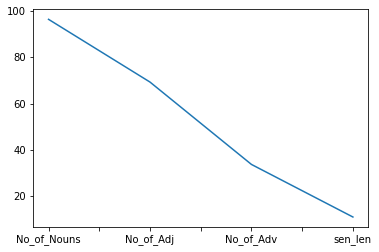

In [ ]:


p_values_for_chi_scores = pd.Series(chi_scores[0],index = X.columns)
p_values_for_chi_scores.sort_values(ascending = False , inplace = True)
p_values_for_chi_scores.plot.line()


<AxesSubplot:>

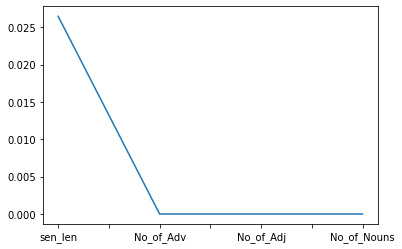

In [ ]:
p_values_for_chi_scores = pd.Series(chi_scores[1],index = X.columns)
p_values_for_chi_scores.sort_values(ascending = False , inplace = True)
p_values_for_chi_scores.plot.line()
